In [204]:
train['Item_Weight']=np.where(train['Item_Weight'].isnull(),np.nanmedian(train['Item_Weight']),train['Item_Weight'])
train['Item_Weight'].isnull().value_counts()

False    8523
Name: Item_Weight, dtype: int64

In [205]:
train['Outlet_Size']=np.where(train['Outlet_Size'].isnull(),train['Outlet_Size'].mode(),train['Outlet_Size'])
train['Outlet_Size'].isnull().value_counts()

False    8523
Name: Outlet_Size, dtype: int64

In [206]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [207]:
train["Item_Fat_Content"]=pd.DataFrame(np.where(train["Item_Fat_Content"]=="LF","Low Fat",train["Item_Fat_Content"]))

train["Item_Fat_Content"]=pd.DataFrame(np.where(train["Item_Fat_Content"]=="low fat","Low Fat",train["Item_Fat_Content"]))

train["Item_Fat_Content"]=pd.DataFrame(np.where(train["Item_Fat_Content"]=="reg","Regular",train["Item_Fat_Content"]))

train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [208]:
train.skew()

Item_Weight                  0.121845
Item_Visibility             -2.642890
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
YOB                          0.396641
dtype: float64

In [210]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,YOB
count,8523.00000,8317.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,4.689819,140.992782,1997.831867,2181.288914,21.168133
std,4.22724,1.385769,62.275067,8.371760,1706.499616,8.371760
min,4.55500,-3.222330,31.290000,1985.000000,33.290000,10.000000
25%,9.31000,4.669621,93.826500,1987.000000,834.247400,15.000000
50%,12.60000,5.139885,143.012800,1999.000000,1794.331000,20.000000
75%,16.00000,5.423088,185.643700,2004.000000,3101.296400,32.000000
max,21.35000,5.855536,266.888400,2009.000000,13086.964800,34.000000


In [193]:
train['ln']=train['Item_Visibility']*100

In [203]:
train['ln']=np.where(train['ln']==0,1,train['ln'])
train['ln']=np.log(train['ln'])

KeyError: 'ln'

In [195]:
train['Item_Visibility']=train['ln']
train['Item_Visibility'].skew()
del train['ln']

In [196]:
train['Item_Visibility'].skew()

-2.6428896118826324

In [197]:
train.skew()

Item_Weight                  0.121845
Item_Visibility             -2.642890
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
YOB                          0.396641
dtype: float64

In [198]:
train['YOB']=2019-train['Outlet_Establishment_Year']
train['YOB'].skew()

0.39664078591553986

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


{'whiskers': [<matplotlib.lines.Line2D at 0x290e145df60>,
 'caps': [<matplotlib.lines.Line2D at 0x290e14695c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x290e145de48>],
 'medians': [<matplotlib.lines.Line2D at 0x290e1469c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x290e1469f98>],
 'means': []}

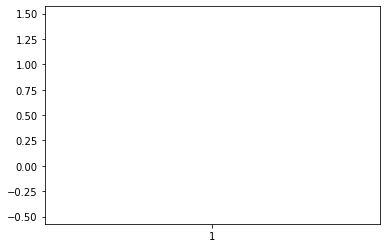

In [200]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(train['Item_Visibility'])

In [85]:
type(train['Outlet_Size'])
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,YOB
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,1.575516,140.992782,1997.831867,2181.288914,21.168133
std,4.22724,0.863444,62.275067,8.371760,1706.499616,8.371760
min,4.55500,-1.028704,31.290000,1985.000000,33.290000,10.000000
25%,9.31000,0.992862,93.826500,1987.000000,834.247400,15.000000
50%,12.60000,1.685119,143.012800,1999.000000,1794.331000,20.000000
75%,16.00000,2.246917,185.643700,2004.000000,3101.296400,32.000000
max,21.35000,3.491620,266.888400,2009.000000,13086.964800,34.000000


In [86]:
train['Outlet_Size']=pd.Categorical(train['Outlet_Size'])
df_Dummies=pd.get_dummies(train['Outlet_Size'],prefix='category')


In [87]:
train1=train.copy()
train1=train1.join(df_Dummies)

In [88]:
train['Item_Fat_Content']=pd.Categorical(train['Item_Fat_Content'])
df_Dum=pd.get_dummies(train['Item_Fat_Content'],prefix='category')
train1=train1.join(df_Dum)

In [89]:
train1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,YOB,category_High,category_Medium,category_Small,category_Low Fat,category_Regular
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,1.575516,140.992782,1997.831867,2181.288914,21.168133,0.109351,0.610466,0.280183,0.647307,0.352693
std,4.22724,0.863444,62.275067,8.371760,1706.499616,8.371760,0.312098,0.487673,0.449115,0.477836,0.477836
min,4.55500,-1.028704,31.290000,1985.000000,33.290000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.31000,0.992862,93.826500,1987.000000,834.247400,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.60000,1.685119,143.012800,1999.000000,1794.331000,20.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,16.00000,2.246917,185.643700,2004.000000,3101.296400,32.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,21.35000,3.491620,266.888400,2009.000000,13086.964800,34.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [129]:
train1[['Item_Type',
        'Outlet_Location_Type','Outlet_Type']]=pd.Categorical(train1[['Item_Type','Outlet_Location_Type','Outlet_Type']])
df=pd.get_dummies(train1[['Item_Type','Outlet_Location_Type','Outlet_Type']],prefix="category")
train1=train1.join(df)

In [167]:
x1=train1.drop(['Item_Identifier','Item_Fat_Content','Outlet_Size','Item_Type','Outlet_Identifier','Outlet_Location_Type'
               ,'Outlet_Type','Item_Outlet_Sales'],axis=1)

In [168]:
y=train['Item_Outlet_Sales']

In [169]:
from sklearn.linear_model import LinearRegression

LM=LinearRegression()

r=LM.fit(x1,y)

preds_y=LM.predict(x1)



In [170]:
from sklearn.tree import DecisionTreeClassifier


In [171]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y,preds_y)

np.sqrt(mse)


1379.487299335822

In [172]:
test=pd.read_csv("Test_1.csv")
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [173]:
test['Item_Weight']=np.where(test['Item_Weight'].isnull(),np.nanmedian(test['Item_Weight']),test['Item_Weight'])

test['Outlet_Size']=np.where(test['Outlet_Size'].isnull(),test['Outlet_Size'].mode(),test['Outlet_Size'])

test[['Item_Weight','Outlet_Size']].isnull().sum()

Item_Weight    0
Outlet_Size    0
dtype: int64

In [174]:
test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [175]:
test["Item_Fat_Content"]=pd.DataFrame(np.where(test["Item_Fat_Content"]=="LF","Low Fat",test["Item_Fat_Content"]))

test["Item_Fat_Content"]=pd.DataFrame(np.where(test["Item_Fat_Content"]=="low fat","Low Fat",test["Item_Fat_Content"]))

test["Item_Fat_Content"]=pd.DataFrame(np.where(test["Item_Fat_Content"]=="reg","Regular",test["Item_Fat_Content"]))

test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [176]:
test.skew()

Item_Weight                  0.166489
Item_Visibility              1.238312
Item_MRP                     0.136182
Outlet_Establishment_Year   -0.396306
dtype: float64

In [177]:
test['Item_Visibility']*=100
test['Item_Visibility'].skew()

1.2383124276598978

In [178]:
test['Item_Visibility']=np.where(test['Item_Visibility']==0,1,test['Item_Visibility'])
test['Item_Visibility']=np.log(test['Item_Visibility'])

In [179]:
test['Item_Visibility'].skew()

-0.40414939878427475

In [180]:
test['Outlet_Size']=pd.Categorical(test['Outlet_Size'])
test['YOB']=2019-test['Outlet_Establishment_Year']
df_Dummies=pd.get_dummies(test['Outlet_Size'],prefix='category')
test1=test.copy()
test1=test1.join(df_Dummies)
test['Item_Fat_Content']=pd.Categorical(test['Item_Fat_Content'])
df_Dum=pd.get_dummies(test['Item_Fat_Content'],prefix='category')
test1=test1.join(df_Dum)
test1.describe()
test1[['Item_Type',
        'Outlet_Location_Type','Outlet_Type']]=pd.Categorical(test1[['Item_Type','Outlet_Location_Type','Outlet_Type']])
df=pd.get_dummies(test1[['Item_Type','Outlet_Location_Type','Outlet_Type']],prefix="category")
test1=test1.join(df)
x=test1.drop(['Item_Identifier','Item_Fat_Content','Outlet_Size','Item_Type','Outlet_Identifier','Outlet_Location_Type'
               ,'Outlet_Type'],axis=1)
# y=test['Item_Outlet_Sales']

In [186]:
y=LM.predict(x)

ValueError: Expected 2D array, got scalar array instead:
array=1.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [185]:
import ggplot

AttributeError: module 'pandas' has no attribute 'tslib'